In [1]:
import pandas as pd
import numpy as np
from ams_paq_utilities import *
from ams_utilities import *
import matplotlib.colors
import matplotlib.artist
import matplotlib.patches as patch
import matplotlib.cm

In [2]:
morph_clusters=pd.read_csv('E:\Jake\morphology_k-means_clusters.csv', index_col=0)
morph_clusters

,2,3,4,5,6,7,8,9,10
AS016: Cell01,0,2,1,3,0,0,4,1,5
AS016: Cell02,0,2,1,0,1,1,1,7,2
AS029: Cell01,1,1,0,1,2,2,6,8,1
AS030: Cell01,0,2,1,3,0,0,4,1,5
AS036: Cell01,0,2,1,3,0,0,4,1,9
AS038: Cell01,0,2,1,0,1,1,1,7,9
AS039: Cell01,0,2,1,3,0,0,4,1,5
AS040: Cell01,0,2,1,3,0,0,4,7,2
AS045: Cell01,0,2,1,0,1,1,1,7,2
AS049: Cell01,0,0,2,0,1,1,5,3,0


In [3]:
PCA_ephys=pd.read_csv(r'\\163.1.248.177\share\Data\Ephys\2020-06-29_EphysPCs.csv', index_col=1)
PCA_ephys=PCA_ephys.T.iloc[[1,2]]

#Rename cells to fit my convention
cellNames=np.array(PCA_ephys.columns)
for j in range (1,7):
    cellNames= [i.replace('Cell'+str(j),'Cell0'+str(j)) for i in cellNames]
PCA_ephys.columns=cellNames
PCA_ephys.head()

,AS031: Cell01,AS032: Cell01,AS034: Cell01,AS035: Cell01,AS036: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,AS041: Cell01,AS045: Cell01,...,AS213: Cell01,AS214: Cell01,AS215: Cell02,AS217: Cell02,AS217: Cell03,AS218: Cell01,AS219: Cell03,AS220: Cell01,AS220: Cell02,AS221: Cell02
principal component 0,0.426637,4.291153,0.057112,3.200719,-0.266988,-0.540228,-0.430550,5.097091,0.327482,-0.53660,...,-1.169016,-2.402414,0.444586,-0.351209,0.118109,-2.471570,0.261253,-1.099304,4.061032,0.379611
principal component 1,0.738384,1.707385,-1.996059,-3.207650,-0.340855,1.070002,-1.024677,0.204398,0.658824,-1.62723,...,1.131339,0.731178,2.316623,-0.816810,1.419246,0.528826,2.172884,1.089224,3.053806,-1.416864


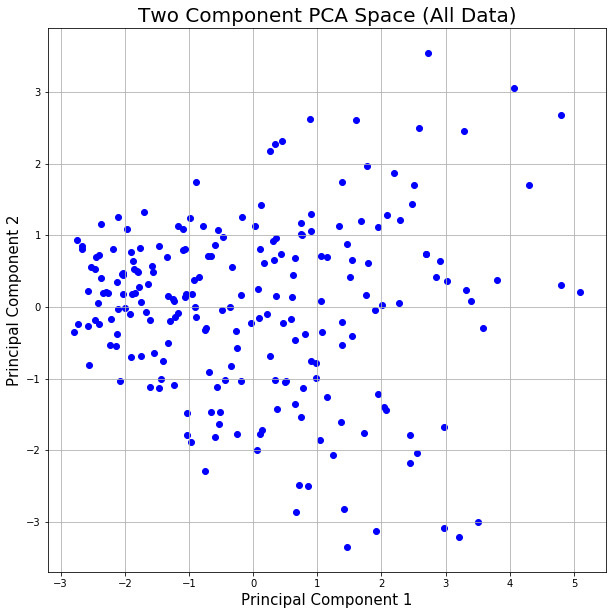

In [4]:
# Create plot of PC space (components 1/2)
P1 = PCA_ephys.iloc[0,:]
P2 = PCA_ephys.iloc[1,:]
labels = cellNames


fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(P1,P2, color='blue')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA Space (All Data)', fontsize = 20)
ax.grid()

# for i,type in enumerate(labels):
    
#     x = P1[i]
#     y = P2[i]
#     plt.text(x+0.03, y+0.03, type, fontsize=10)
    
    
plt.show()

In [5]:
#Produce a dataframe of morph cluster labels. Vaule of -1 means no morph data
clustersDefault=pd.DataFrame([-1]*218, index=cellNames)

#change morph_clusters.iloc  below for different # of k-means
clusters=pd.concat([clustersDefault, morph_clusters.iloc[:,1]], axis=1, join='outer', sort='True')
clusters=clusters.dropna(subset=[0])

morphClusters=pd.DataFrame(clusters.agg(max,axis=1),columns=['Morph Cluster'])
morphClusters.head()


,Morph Cluster
AS031: Cell01,-1.0
AS032: Cell01,-1.0
AS034: Cell01,-1.0
AS035: Cell01,-1.0
AS036: Cell01,2.0


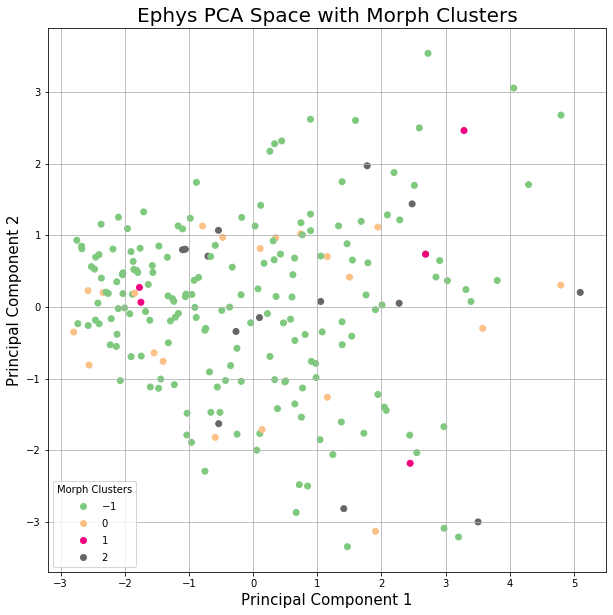

In [6]:
colors=morphClusters['Morph Cluster']

fig, ax = plt.subplots(figsize=(10,10))
plot=plt.scatter(P1,P2, c=colors, cmap='Accent')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Ephys PCA Space with Morph Clusters', fontsize = 20)
ax.grid()

legend1=ax.legend(*plot.legend_elements(),
                    loc="lower left", title="Morph Clusters")

plt.savefig('E:\Jake\Ephys_PCA_morph_clusters')